# 🚗

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

In [4]:
data1 = pd.read_csv("../data/raw/Train.csv")
data2 = pd.read_csv("../data/raw/Test.csv")
rawdata = pd.concat([data1,data2],axis="rows")


In [5]:
rawdata.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
rawdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


We have 10,695 total rows and 10 columns

7 categorical:

    Gender of the customer
    Marital status of the customer
    Is the customer a graduate?
    Profession of the customer
    Spending score of the customer
    Var_1: Anonymised Category for the customer

4 numerical:

    ID
    Age of customer
    Work Experience in years
    Number of family members for the customer (including the customer)



    Segmentation (target)

## Basic EDA of the categorical data

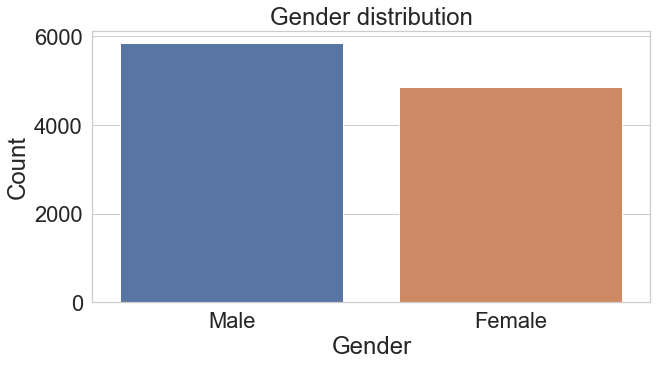

In [9]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(10, 5))
sns.countplot(data=rawdata, x='Gender',ax=ax)
ax.set(title='Gender distribution', ylabel = 'Count');

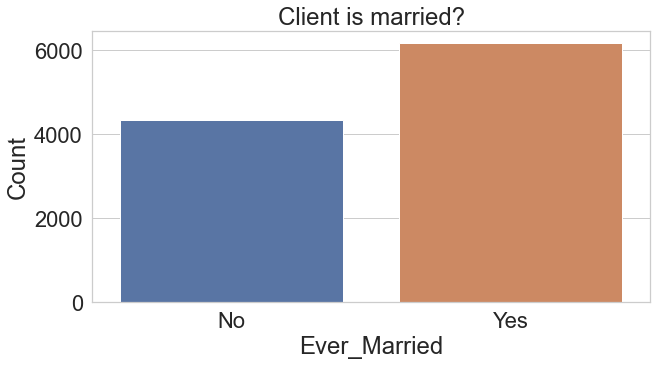

In [10]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(10, 5))
sns.countplot(data=rawdata, x='Ever_Married', ax=ax)
ax.set(title='Client is married?', ylabel='Count');

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Client is graduated?')]

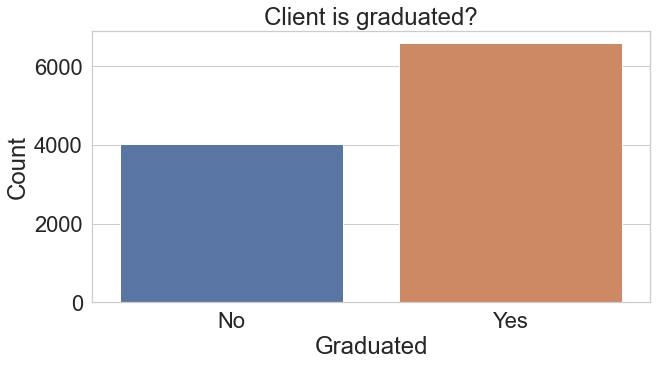

In [12]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(10, 5))
sns.countplot(data=rawdata, x='Graduated', ax=ax)
ax.set(title='Client is graduated?', ylabel='Count')


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Client Profession?')]

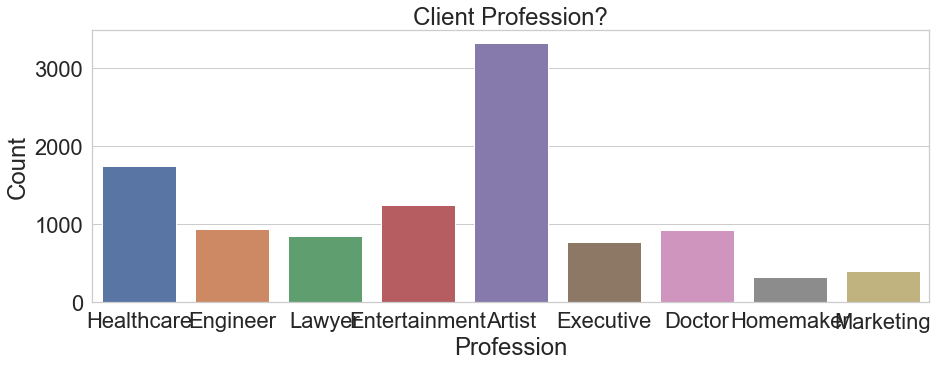

In [14]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(15, 5))
sns.countplot(data=rawdata, x='Profession', ax=ax)
ax.set(title='Client Profession?', ylabel='Count')


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Spending Score?')]

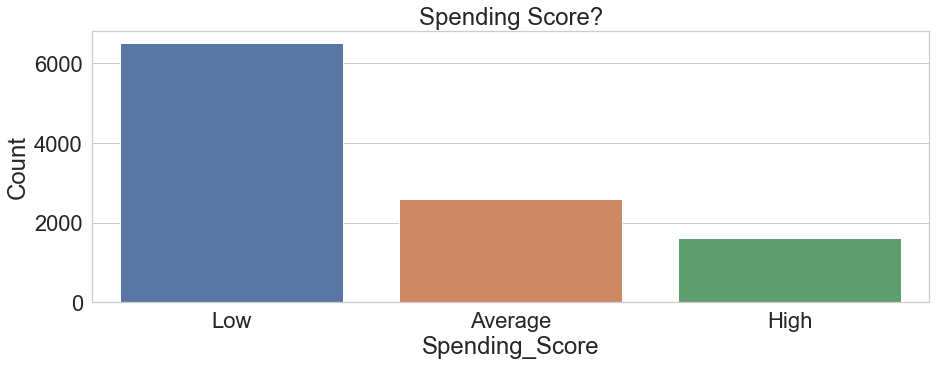

In [15]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(15, 5))
sns.countplot(data=rawdata, x='Spending_Score', ax=ax)
ax.set(title='Spending Score?', ylabel='Count')


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Anonymised Category distribution?')]

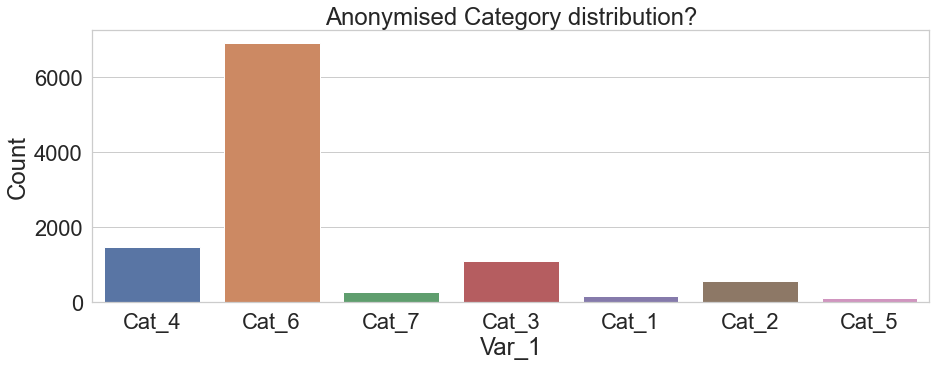

In [16]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(15, 5))
sns.countplot(data=rawdata, x='Var_1', ax=ax)
ax.set(title='Anonymised Category distribution?', ylabel='Count')


In [ ]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(15, 5))
sns.countplot(data=rawdata, x='Var_1', ax=ax)
ax.set(title='Anonymised Category distribution?', ylabel='Count')


In [ ]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(15, 5))
sns.countplot(data=rawdata, x='Var_1', ax=ax)
ax.set(title='Anonymised Category distribution?', ylabel='Count')


In [ ]:
fig, ax = plt.subplots(nrows=1,
                       ncols=1, figsize=(15, 5))
sns.countplot(data=rawdata, x='Var_1', ax=ax)
ax.set(title='Anonymised Category distribution?', ylabel='Count')


##  Missing values, Encoding and Scaling

In [42]:
len(data_for_segmentation)

6665

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled= scaler.fit_transform(data_for_segmentation['Age'])


ValueError: Expected 2D array, got 1D array instead:
array=[22. 67. 67. ... 33. 27. 37.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
scaled

In [ ]:
data_for_segmentation['Age']

In [ ]:
'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
